## MarKov_Chain Sample code

#### with 4 discrete states and Pij Transition prob matrix

#### Ref: <https://github.com/SungchulLee/reinforcement_learning>

In [1]:
import numpy as np
states = [0, 1, 2, 3]
N_STATES = len(states)

In [2]:
P = np.empty((N_STATES, N_STATES))
l = 0.3 # left prob
r = 0.3 # right prob
s = 1.0 - l - r # stay prob
# state transition matrix
P[0, : ] = [l+s, r, 0, 0]
P[1, : ] = [l, s, r, 0]
P[2, : ] = [0, l, s, r]
P[3, : ] = [0, 0, l, s+r]

In [6]:
# set random initial state
np.random.seed(3)
state = np.random.choice(states)
print(state)

2


current_state:  2, next_state  2, transition_prob: 0.39999999999999997
current_state:  2, next_state  3, transition_prob: 0.3
current_state:  3, next_state  2, transition_prob: 0.3
current_state:  2, next_state  2, transition_prob: 0.39999999999999997
current_state:  2, next_state  1, transition_prob: 0.3


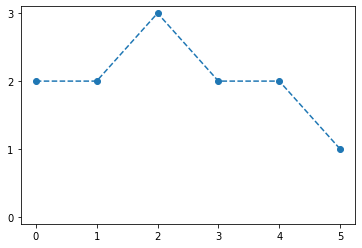

In [7]:
import matplotlib.pyplot as plt

np.random.seed(1)
num_steps = 5
msg = "current_state: {:2}, next_state {:2}, transition_prob: {}"
state_history = []
state_history.append(state)
for _ in range(num_steps):
    next_state = np.random.choice(states, p=P[state,:])
    prob = P[state, next_state]
    print(msg.format(state, next_state,prob))
    state = next_state
    state_history.append(state)

fig, ax = plt.subplots()
ax.plot(state_history, 'o--')
ax.set_ylim([-0.1,3.1])
ax.set_yticks([0,1,2,3])
plt.show()

# Exercise
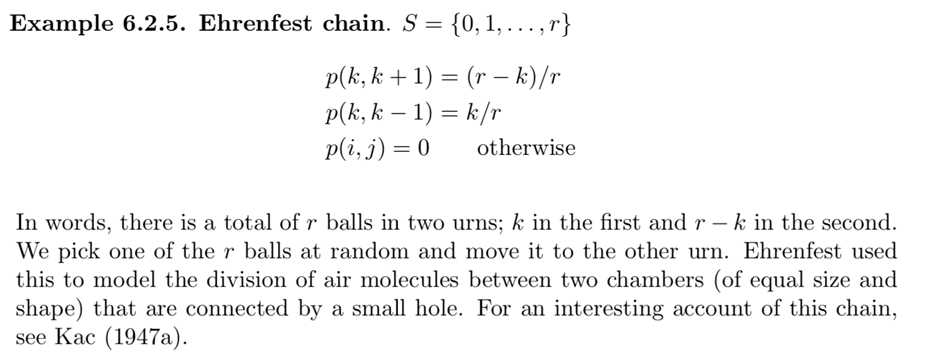

#### From lecture <https://www.youtube.com/user/sungchulyonseiackr>

In [35]:
import numpy as np

r = 5 # number of balls = 5 also states
states  = []
for s in range(r+1):
    states.append(s)
print(states) # check states
num_states = len(states)
print(num_states) # check number of states

[0, 1, 2, 3, 4, 5]
6


In [36]:
P = np.zeros((num_states,num_states)) # Transition matrix
for k in range(num_states):
    if k<=0:
        P[k, k+1] = (r-k)/r
    elif k>=5:
        P[k, k-1] = k/r
    else:
        P[k, k+1] = (r-k)/r
        P[k, k-1] = k/r        
    # it also works below code
    '''
    try:
        P[k, k+1] = (r-k)/r
        P[k, k-1] = k/r
    except:
        P[k, k-1] = k/r
        continue
    '''
print(P)

[[0.  1.  0.  0.  0.  0. ]
 [0.2 0.  0.8 0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0. ]
 [0.  0.  0.6 0.  0.4 0. ]
 [0.  0.  0.  0.8 0.  0.2]
 [0.  0.  0.  0.  1.  0. ]]


In [39]:
np.random.seed()
current_state = np.random.choice(states) # initial random state or random start point
print(current_state)

0


current state:  0 next_state  1 transition probability 1.0
current state:  1 next_state  2 transition probability 0.8
current state:  2 next_state  3 transition probability 0.6
current state:  3 next_state  4 transition probability 0.4
current state:  4 next_state  3 transition probability 0.8
current state:  3 next_state  2 transition probability 0.6
current state:  2 next_state  1 transition probability 0.4
current state:  1 next_state  2 transition probability 0.8
current state:  2 next_state  1 transition probability 0.4
current state:  1 next_state  2 transition probability 0.8


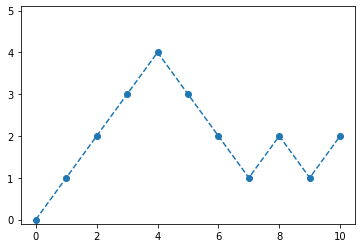

In [40]:
import matplotlib.pyplot as plt

history = []
history.append(current_state)
msg_format = "current state: {:2} next_state {:2} transition probability {}"
# set number of steps
steps = 10
# random seed
np.random.seed()
for _ in range(steps):
    next_state = np.random.choice(states,p=P[current_state, : ])
    p = P[current_state,next_state] # Pij : from i to  j prob
    print(msg_format.format(current_state,next_state,p))
    current_state = next_state # update
    history.append(current_state)

ex_fig,ex_ax = plt.subplots()
ex_ax.plot(history,'o--')
ex_ax.set_ylim([-0.1,5.1])
ex_ax.set_yticks(states)
plt.show()